## 16일차 강의 (2021.7.26)
# 머신러닝

### 선형회귀 (Linear Regression)
$$ \hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + b $$
- (x1,x2,x3) 는 "한 샘플"의 입력값 (속성이 3개인 경우임)
- 목표값 y 와 예측값 $ \hat{y} $ 비교
- (w1,w2,w3) 는 가중치, b 는 절편값
> 가장 적합한 w 와 b 값을 찾는 것이 목표

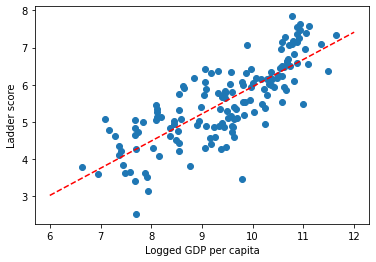
w = 0.73203909<br>
b = -1.3719060741319815

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('world_happiness_report_2021.csv')
happy.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [63]:
# GDP 를 입력하여 행복지수를 예측한다
X = happy['Logged GDP per capita'].values
y = happy['Ladder score'].values

In [64]:
X.shape, y.shape

((149,), (149,))

In [65]:
# 입력값은 항상 표형태여야 한다
X = X.reshape(149,1)
X.shape

(149, 1)

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
happy = pd.read_csv('world_happiness_report_2021.csv')
X = happy['Logged GDP per capita'].values
y = happy['Ladder score'].values

model = LinearRegression()
model.fit(X, y) # fit = 훈련

LinearRegression()

In [68]:
model.coef_ # w, 가중치, 기울기

array([0.73203909])

In [69]:
model.intercept_ # b, 절편값

-1.3719060741319842

In [70]:
# GDP 가 5일때 예측값
5*0.73203909 + -1.3719060741319842

2.2882893758680156

In [71]:
# GDP 가 10일때 예측값
10*0.73203909 + -1.3719060741319842

5.948484825868015

In [72]:
w = model.coef_[0]
b = model.intercept_

w,b

(0.7320390899991145, -1.3719060741319842)

In [73]:
xval = np.array([6,13])
yval = xval*w + b
yval

array([3.02032847, 8.1446021 ])

Text(0, 0.5, 'Ladder score')

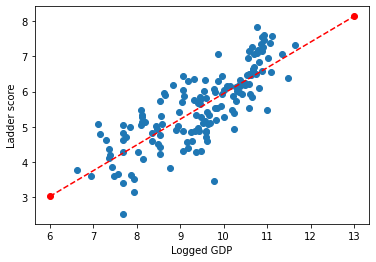

In [75]:
plt.scatter(X[:,0], y)
plt.plot(xval, yval, 'ro--')
plt.xlabel('Logged GDP')
plt.ylabel('Ladder score')

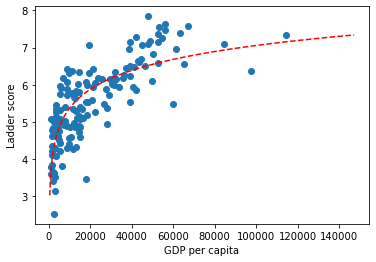

In [78]:
xval = np.arange(6,12,0.1)
yval = w*xval + b

plt.scatter(np.exp(X[:,0]), y)
plt.xlabel('GDP per capita')
plt.ylabel('Ladder score')
plt.plot(np.exp(xval), yval, 'r--')

In [27]:
### 지하철 데이터에서 승차총승객수로 하차총승객수를 예측하는
#   선형회귀 모델을 만드시오

In [28]:
subway = pd.read_csv('CARD_SUBWAY_MONTH_202106.csv')
subway.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,기타
0,20210601,3호선,신사,28955,30583,20210604,NaN
1,20210601,3호선,잠원,4780,4656,20210604,NaN
2,20210601,3호선,고속터미널,33986,32532,20210604,NaN
3,20210601,3호선,교대(법원.검찰청),14136,9362,20210604,NaN
4,20210601,3호선,남부터미널(예술의전당),27604,28821,20210604,NaN


In [30]:
#X = subway['승차총승객수'].values.reshape(-1,1)
X = subway[['승차총승객수']].values
y = subway['하차총승객수'].values

X.shape, y.shape

((18035, 1), (18035,))

(-4640.6, 97474.6, -4610.0, 96810.0)

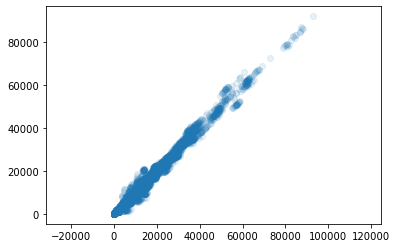

In [35]:
plt.scatter(X[:,0], y, alpha=0.1)
plt.axis('equal')

In [36]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [37]:
w = model.coef_[0]
b = model.intercept_

w, b

(1.0063751010864137, -97.09640317644335)

(-5000.0, 105000.0, -5128.9719086085115, 105572.28921089698)

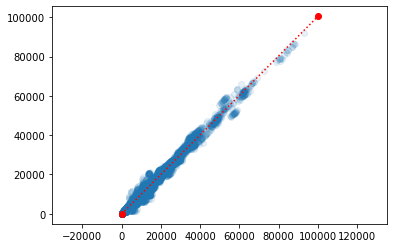

In [39]:
xval = np.array([0,100000])
yval = xval*w + b

plt.scatter(X[:,0], y, alpha=0.1)
plt.plot(xval, yval, 'ro:')
plt.axis('equal')

In [ ]:
### 행복데이터에서 6개의 속성을 사용하여 행복지수를 예측하시오.
'''
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
'''

In [40]:
happy.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [49]:
X = happy.iloc[:, 6:12].values
X.shape

(149, 6)

In [50]:
y = happy['Ladder score']
y.shape

(149,)

In [51]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [52]:
display(model.coef_, model.intercept_)

array([ 0.2795329 ,  2.47620585,  0.03031381,  2.0104647 ,  0.36438194,
       -0.60509177])

-2.237219294474988

In [53]:
X[0]

array([10.775,  0.954, 72.   ,  0.949, -0.098,  0.186])

### 정규화

In [54]:
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
X_norm.shape

(149, 6)

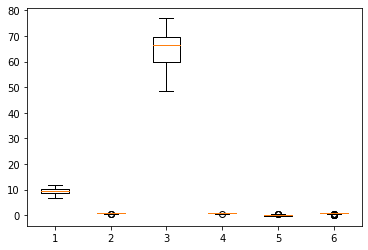

In [62]:
plt.boxplot(X); pass

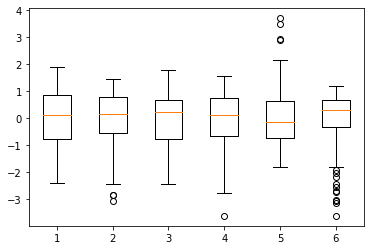

In [61]:
plt.boxplot(X_norm); pass

In [55]:
model = LinearRegression()
model.fit(X_norm, y)

LinearRegression()

In [56]:
display(model.coef_, model.intercept_)

array([ 0.32277859,  0.28353261,  0.20429428,  0.22708367,  0.05471205,
       -0.10808384])

5.532838926174497

In [58]:
X_norm[0]

array([ 1.16288545,  1.21617095,  1.03975002,  1.39355041, -0.55188553,
       -3.03122783])

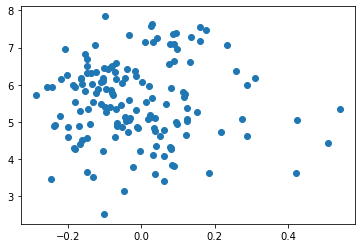

In [59]:
plt.scatter(X[:,4], y)

- 속성이 많아지면 그림을 그릴수 없다!